# Reconhecimento de entidades

In [1]:
import os
import io
import re

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd

In [195]:
import neuralcoref
import spacy

print('spacy version:', spacy.__version__)
print('neuralcoref version:', neuralcoref.__version__)

spacy version: 2.1.3
neuralcoref version: 4.0.0


In [4]:
def read_file(path):
    try:
        with io.open(path, 'r', encoding='utf-8') as f:
            return f.read()
    except UnicodeDecodeError:
        try:
            with io.open(path, 'r', encoding='latin-1') as f:
                return f.read()
        except UnicodeDecodeError:
            return "Could not decode"

In [194]:
folder = "success"

# files sorted by number
files_ordered = sorted(os.listdir(folder), key=lambda name:int(name.split('_')[0]))

# an example file (1)
file = files_ordered[80]

# name file
path = os.path.join(folder, file)

if os.path.isfile(path):
    content = read_file(path)
    print(f"Content of book ... {file}\n")
    # print(content)

Content of book ... 81_Tante_AnneDouglasSedgwick_cleared.txt



In [102]:
paragraphs = content.split('\n\n')
# print(paragraphs)

In [103]:
paragraphs_new = []
contents = []
chapters = []
old_idx = 0

for paragraph in paragraphs:
    # print("\n Paragraph: ", paragraph)
    
    lines = paragraph.split('\n')
    # print(lines)
    if re.match('[IVXLCDM\d]+[\.]*', lines[0].upper().strip()):
        if len(contents) == 0:
            contents = [" ".join(line.lower().split()) for line in lines]
            # print("contents", contents)
            
            if len(contents) == 0:
                print("Not found content", id_file)
                exit()
        continue
           
    if paragraph.lower().strip() in contents:
        if old_idx == 0:
            old_idx = len(paragraphs_new)
        else:
            current_idx = len(paragraphs_new)
            chapter = "\n\n".join(paragraphs_new[old_idx:current_idx])
            chapters.append(chapter)
            old_idx = current_idx
        continue
    
    if not re.match('.*[\w]+.*', paragraph):
        continue
    
    paragraphs_new.append(paragraph)
 
    if old_idx != 0:
        chapter = "\n\n".join(paragraphs_new[old_idx:len(paragraphs_new)])
        chapters.append(chapter)
        
print('Número de parâgrafos:', len(paragraphs))
print('Número de parâgrafos com personagens: ', len(paragraphs_new),
      #len(chapters)
     )    

Número de parâgrafos: 2720
Número de parâgrafos com personagens:  2278


In [104]:
nlp = spacy.load('en_core_web_sm')
neuralcoref.add_to_pipe(nlp)

In [246]:
data = []
geral_entities = []

for i, paragraph in enumerate(paragraphs_new[0:]): # 0:15 (test3), 0: all book
    paragraph = paragraph.replace('\n', ' ')
    paragraph = " ".join(paragraph.split())
    # print('\n', paragraph) #****
    
    doc = nlp(paragraph)
    doc_coref = doc._.coref_resolved
    doc_coref = nlp(doc_coref)
    
    entities = []
    for ent in doc_coref.ents:
        if ent.label_ == "PERSON":
            entities.append(ent.text)
    
    if len(entities) > 1:
        len_words = len(paragraph.split())
        geral_entities.extend(entities)
        
        data.append((i, len_words, entities))
        # print('\n', paragraph)
        print(i, len_words, entities)

print("\nEntidades:\n", geral_entities)
# print("\nData:\n", data)

4 48 ['Bach', 'Bach', 'Okraska', 'Bach', 'Beethoven', 'Appassionata', 'Bachnot Bach']
5 10 ['Bach', 'Liszt']
18 91 ['The Duchess of Bannister', 'Lady Champney', 'Alliston Compton', 'Madame Okraska']
20 63 ["Madame Okraska's", 'Forrester']
23 69 ['Forrester', 'Madame Okraska', 'Madame Okraska', 'Madame Okraska']
24 101 ["Madame Okraska's", 'Norse', 'Alliston', 'Alliston', 'Alliston', 'Madame Okraska']
26 77 ['Oliver', 'Betty Jardine', 'Betty Jardine', 'Oliver', 'Gregory', 'Gregory', 'Betty Jardine', 'Gregory', 'Gregory', 'Betty Jardine']
27 139 ['Ashton', 'Oliver', 'Oliver', 'Oliver', 'Oliver', 'Ashton', 'Captain Ashton', 'Gregory']
29 13 ['Forrester', 'Forrester']
31 96 ['Betty Jardine', 'Forrester', 'Forrester', 'Forrester', 'Forrester', 'Forrester', 'Forrester', 'Forrester', 'Forrester', 'Forrester', 'Forrester', 'Captain Ashton', 'Forrester', 'Forrester']
32 28 ['Gregory', 'Gregory']
34 143 ["Gregory Jardine's", "Gregory Jardine's", "Gregory Jardine's", "Gregory Jardine's", "Gregory

170 51 ['Woodruff', 'Woodruff', 'Louise', 'Woodruff']
176 10 ['Talcott', 'Woodruff']
178 41 ['Woodruff', 'Woodruff', 'Talcott', 'Talcott']
180 76 ['Woodruff', 'Woodruff', 'Woodruff', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Woodruff', 'Les Solitudes', 'Woodruff']
182 34 ['Mais non', 'Woodruff', 'Woodruff', 'Louise']
184 343 ['Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory Jardine', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory']
187 243 ['Armytages', 'Woodruff', 'Gregory', 'Gregory', 'Gregory', 'Pangbourne', 'Armytages', 'Armytages', 'Armytages', 'Armytages', 'Armytages', 'Armytages', 'Armytages', 'Armytages']
188 120 ['Armytages', 'Armytages', 'Gregory', 'Gregory', 'Lady Armytage', 'Constance', 'Widor']
189 90 ['Gregory', 'Constance', 'Constance']
190 8

400 53 ['Madame Okraska', 'Tante']
401 58 ['Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Tante']
402 46 ['Talcott', 'Talcott', 'Gregory', 'Talcott', 'Tante']
403 58 ['Gregory', 'Gregory', 'Gregory', 'Gregory']
405 78 ['Talcott"--with', 'Talcott"--with', 'Tante', 'Tante', 'Talcott', 'Talcott']
407 43 ['Karen', 'Tante']
408 65 ['Talcott', 'Tea', 'Tea', 'Talcott', 'Talcott', 'Talcott', 'Gregory', 'Talcott', 'Talcott', 'Talcott']
419 65 ['Talcott', 'Karen', 'Talcott', 'Tante', 'Talcott', 'Tante', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott']
421 95 ['Karen', 'Talcott', 'Karen', 'Karen', 'Karen', 'Karen', 'Karen', 'Karen', 'Karen', 'Karen', 'Karen']
422 32 ['Karen', 'Talcott']
423 37 ['Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott']
424 103 ['Tante', 'Tante', 'Karen', 'Karen', 'Karen', 'Karen', 'Karen', 'Karen', 'Karen', 'Tante', 'Jardine', 'Tante', 'Jardine', 'Tante', 'Jardine', 'Karen', 'Tante', 'Jardine', 'Tante', 'Jardine', 'Karen']
431 87 

651 182 ['Karen', 'Karen', 'Karen', 'Karen', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Karen', 'Karen', 'Karen', 'Karen']
652 198 ['Gregory', 'Forrester', 'Lavington', 'Tante', 'Gregory', 'Gregory', 'Gregory', 'Karen']
653 78 ['Gregory', 'Gregory']
654 53 ['Tante', 'Tante']
655 71 ['Karen', 'Betty', 'Betty']
656 46 ['Karen', 'Louise', 'Louise', 'Louise', 'Tante']
657 17 ['Betty', 'Gregory']
660 53 ['Karen', 'Tante', 'Karen']
662 94 ['Karen', 'Tante', 'Karen', 'Franz', 'Karen', 'Franz', 'Franz', 'Karen']
664 172 ['Tante', 'Tante', 'Tante', 'Franz', 'Lotta', 'Frau Lippheim']
665 154 ['Franz', 'Franz', 'Franz', 'Karen', 'Karen', 'Tante', 'Painters', 'Strepoff']
667 73 ['Gregory', 'Gregory', 'Gregory', 'Gregory', 'Strepoff', 'Gregory', 'Gregory']
668 107 ['Karen', 'Liebchen']
670 29 ['Just Strepoff', 'Dear Belot', 'Karen', 'Just Strepoff', 'Strepoff']
676 199 ['Belot', 'Belot', 'Belot', 'Belot', 'Belot', 'Belot', 'Franco', 'Belot', 'Margot', 'Belot', 'Karen', 'Belot', 'Karen', 'Karen', 

824 44 ['Karen', 'I.', 'Gregory']
825 127 ['Bouddha', 'Madame von Marwitz']
826 34 ['Karen', 'Tante', 'Tante', 'Gregory']
827 113 ['Madame von Marwitz', 'Karen', 'Karen Karen', 'Karen', 'Karen', 'Jardine', 'Karen']
828 116 ['Gregory', 'Gregory', 'Gregory', 'Gregory']
829 111 ['Karen', 'Karen', 'Karen', 'Karen', 'Bouddha', 'Karen']
830 108 ['Karen', 'Jardine', 'Karen']
831 58 ['Gregory', 'Karen', 'Gregory', 'Gregory', 'Gregory', 'Gregory', 'Gregory']
832 46 ['Karen', 'Karen']
834 10 ['Karen', 'Karen']
837 25 ['Madame von Marwitz', 'Karen']
842 29 ['Tante', 'Karen']
846 65 ['Tante', 'Gregory', 'Karen', 'Karen', 'Karen', 'Tante']
847 42 ['Tante', 'Mrs', 'Forrester', 'Betty']
848 11 ['Betty', 'Betty']
849 17 ['Lady Jardine', 'Gregory', 'Tante', 'Tante', 'Tante']
850 42 ['Betty', 'Madame von Marwitz', 'Tante']
852 91 ['Madame von Marwitz', 'Karen']
853 34 ['Karen', 'Karen']
855 82 ['Barker', 'Rose', 'Karen', 'Karen']
858 63 ['Tante', 'Karen', 'Les Solitudes', 'Les Solitudes']
862 46 ['Tante

1019 8 ['Betty', 'Karen']
1021 26 ['Betty', 'Karen', 'Betty', 'Karen', 'Betty', 'Karen']
1022 56 ['Karen', 'Karen', 'Bannister', 'Bannister']
1023 22 ['Tante', 'Gregory']
1025 11 ['Gregory', 'Tante', 'Karen', 'Karen']
1026 49 ['Karen', 'Madame von Marwitz']
1027 27 ['Karen', 'Betty', 'Karen', 'Karen', 'Betty', 'Karen', 'Betty', 'Betty']
1028 33 ['Karen', 'Karen', 'Gregory']
1029 35 ['Gregory', 'Tante']
1034 41 ['Forrester', 'Forrester', 'Betty', 'Karen', 'Karen', 'Karen']
1035 71 ['Forrester', 'Karen', 'Forrester', 'Forrester', 'Karen', 'Forrester', 'Forrester', 'Forrester', 'Forrester']
1036 26 ['Betty', 'Karen', 'Betty', 'Karen']
1037 45 ['Lady Jardine', "Madame von Marwitz's"]
1039 73 ['Karen', 'Karen']
1040 28 ['Betty', 'Betty', 'Betty', 'Gregory']
1043 47 ['Betty', 'Betty', 'Karen', 'Gregory', 'Betty']
1045 19 ['Karen', 'Karen']
1046 28 ['Forrester', 'Forrester']
1048 39 ['Forrester', 'Gregory', 'Karen']
1051 30 ['Betty', 'Betty', 'Betty', 'Betty']
1052 75 ['Betty', 'Betty', 'Kare

1253 349 ['Madame von Marwitz', 'Karen', 'Karen', 'Karen', 'Karen', 'Karen', 'Gregory', 'Karen', 'Franz', 'Karen', 'Karen', 'Karen', 'Karen', 'Karen', 'Karen', 'Karen']
1255 46 ['Gregory', 'Gregory']
1257 55 ['Karen', 'Karen', 'Karen']
1258 104 ['Gregory', 'Madame von Marwitz', 'Herr Lippheim']
1259 42 ['Madame von Marwitz', 'Madame von Marwitz', 'Karen', 'Karen']
1260 28 ['Karen', 'Gregory']
1264 34 ['Tante', 'Karen', 'Karen']
1265 72 ['Madame von Marwitz', 'Forrester']
1266 40 ['Tante', 'Gregory', 'Gregory', 'Gregory']
1269 101 ['Madame von Marwitz', 'Karen']
1270 144 ['Karen', 'Karen', 'Karen', 'Karen']
1271 114 ['Karen', 'Tante', 'Louise', 'Louise']
1272 11 ['Karen', 'Karen']
1276 10 ['Karen', 'Karen']
1277 96 ['Madame von Marwitz', 'Karen']
1278 53 ['Gregory', 'Gregory', 'Gregory', 'Karen', 'Gregory', 'Madame von Marwitz']
1282 96 ['Madame von Marwitz', 'Madame von Marwitz', 'Gregory', 'Forrester', 'Forrester', 'Forrester']
1283 20 ['Gregory', 'Gregory', 'Gregory']
1285 89 ['Forre

1589 92 ['Drew', 'Karen', 'Besnard', 'Drew', 'Karen', 'Karen', 'Tante', 'Karen', 'Karen', 'Karen', 'Drew', 'Drew']
1590 104 ['Drew', 'Tante']
1592 40 ['Karen', 'Karen']
1594 25 ['Karen', 'Karen', 'Karen']
1596 35 ['Tante', 'Karen', 'Karen']
1598 66 ['Karen', 'Karen', 'Karen', 'Drew']
1599 35 ['Drew', 'Drew']
1600 43 ['Karen', 'Karen']
1601 55 ['Drew', 'Drew', 'Karen', 'Madame von Marwitz', 'Karen', 'Drew']
1603 46 ['Tante', 'Karen', 'Tante', 'Tante']
1605 99 ['Karen', 'Drew']
1608 44 ['Tante', 'Karen', 'Tante']
1609 30 ['Drew', 'Karen', 'Drew Claude', 'Karen']
1612 21 ['Drew', 'Drew']
1613 27 ['Karen', 'Talcott', 'Talcott']
1615 69 ['Gregory', 'Gregory', 'Tante']
1616 86 ['Tante', 'Tante', 'Tante', 'Karen', 'Drew', 'Karen Karen', 'Karen', 'Karen']
1617 63 ['Karen', 'Karen', 'Karen', 'Tante', 'Drew', 'Karen', 'Tante', 'Karen', 'Karen']
1618 241 ['Talcott', 'Karen', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Karen', 'Talcott', 'Talcott', 'Karen', 'Talcott', 'Karen', 'Karen',

1851 220 ['Pavelek', 'Pavelek', 'Dolores', 'Dolores', 'Mercedes']
1853 391 ['Karen', 'Baron', 'Baron', 'Talcott', 'Baron', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Baldwin Tanner', 'Baldwin Tanner', "Talcott'd", 'Baldwin Tanner', 'Baldwin Tanner', 'Baldwin Tanner', "Baldwin Tanner'd", 'Talcott', 'Talcott', 'Baldwin Tanner', 'Baldwin Tanner', 'Baldwin Tanner', 'Baldwin', 'Baldwin', 'Baldwin']
1854 561 ['Talcott', 'Talcott', 'Baron', 'Baldwin', 'Talcott', 'Baron', 'Talcott', 'Baldwin', 'Baldwin', 'Talcott', 'Baldwin Tanner', 'Talcott', 'Mercedes', "Talcott'd", 'Talcott', 'Talcott', 'Talcott', 'Baron', 'Talcott', 'Talcott', 'Baron', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Baron', 'Talcott', 'Baron', 'Baron', 'Talcott', 'Talcott', 'Talcott', 'Baron', 'Talcott', 'Baron', 'Baron', 'Talcott', "Baron'd", 'Talcott', 'Talcott', "Talcott'd", 'Talcott', 'Talcott', 'Talcott', 'Talc

2019 97 ['Slifer', 'Maude', 'Slifer', 'Maude', 'Slifer', 'Maude', 'Slifer', 'Maude', 'Slifer', 'Maude', 'Slifer', 'Maude', 'Slifer', 'Maude', 'Marwitz', 'Madame']
2021 30 ['Karen', 'Karen', 'Karen', 'Talcott', 'Talcott']
2023 24 ['Talcott', 'Talcott', 'Talcott', 'Talcott']
2024 60 ['Talcott', 'Talcott', 'Talcott']
2026 37 ['Gregory', 'Gregory', 'Gregory']
2027 59 ['Talcott', 'Karen', 'Franz Lippheim', 'Franz Lippheim', 'Franz Lippheim', 'Karen', 'Franz Lippheim', 'Franz Lippheim']
2029 38 ['Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott']
2035 119 ['Falmouth', "Onkel Ernst's"]
2036 197 ['Talcott', 'Talcott', 'Talcott', 'Talcott', 'Gregory', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott']
2037 229 ['Karen', 'Karen', 'Karen', 'Falmouth', 'Fears', 'Karen', 'Karen', 'Talcott', 'Karen', 'Gregory', 'Karen', 'Karen', 'Gregory', 'Gregory', 'Karen', 'Karen', 'Karen', 'Gregory', 'Gregory', 'Gregor

2217 27 ['Karen', 'Karen']
2219 88 ['Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott']
2221 55 ['Talcott', 'Talcott', 'Karen', 'Talcott', 'Talcott']
2222 22 ['Talcott', 'Talcott', 'Talcott']
2225 40 ['Talcott', 'Franz Lippheim']
2226 23 ['Talcott', 'Talcott', 'Talcott', 'Franz']
2227 23 ['Franz', 'Talcott']
2228 40 ['Talcott', 'Karen', 'Talcott', 'Talcott', 'Talcott', 'Franz']
2229 46 ['Karen', 'Franz', 'Franz', 'Karen']
2230 100 ['Karen', 'Talcott', 'Karen', 'Talcott', 'Franz']
2233 24 ['Talcott', 'Karen']
2236 47 ['Talcott', 'Talcott', 'Talcott', 'Talcott', 'Talcott']
2237 111 ['Jardine', 'Talcott', 'Talcott', 'Karen', 'Karen', 'Karen', 'Karen', 'Franz Lippheim', 'Karen', 'Karen', 'Karen', 'Karen', 'Jardine', 'Karen', 'Karen', 'Karen', 'Karen']
2238 58 ['Madame von Marwitz', 'Madame von Marwitz', 'Franz']
2239 18 ['Gregory', 'Gregory']
2241 23 ['Jardine', 'Talcott', 'Jardine']
2242 71 ['Talcott', 'Talcott', 'Talcott', 'Gregor

In [247]:
# Conteo de entidades
counter = Counter(geral_entities)
print('Conteo de entidades:\n', dict(counter))

Conteo de entidades:
 {'Bach': 5, 'Okraska': 1, 'Beethoven': 2, 'Appassionata': 1, 'Bachnot Bach': 1, 'Liszt': 1, 'The Duchess of Bannister': 1, 'Lady Champney': 1, 'Alliston Compton': 1, 'Madame Okraska': 29, "Madame Okraska's": 3, 'Forrester': 350, 'Norse': 2, 'Alliston': 27, 'Oliver': 15, 'Betty Jardine': 32, 'Gregory': 1000, 'Ashton': 2, 'Captain Ashton': 3, "Gregory Jardine's": 13, 'Mephistophelian': 1, "Gregory Jardine'schatter": 1, 'Betty': 196, 'Woodruff': 76, 'Gregory Jardine': 21, 'Alfred Stevens Gregory': 1, 'claret?--Oh': 1, 'Eleanor Scrotton': 7, 'Eleanor': 25, 'Jonas Scrotton': 1, 'Scrotton': 111, 'Madame von Marwitz': 143, 'Lady Campion': 5, 'Miss Harding': 4, 'Harding': 24, 'Harding Miss Harding': 2, 'Karen': 1982, 'Karen Woodruff': 15, 'Jardine': 120, 'Tante': 478, 'Schultz': 2, 'Jenkins': 3, 'Trop': 1, 'Pater': 4, 'Mona Lisa': 3, 'Fontainebleau': 6, 'Les Solitudes': 32, 'Talcott': 836, "Lady Jardine's": 31, 'Lady Jardine': 13, 'Scrotton Miss Scrotton': 2, 'Gregory eye

## Criação de rede de coocorrência

### a. Matriz de coocorrência de personagens

In [471]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Lista das entidades (personagens)
entities_list = list(set(geral_entities))

# Inicializa a matriz de coocorrência
cooccurrence_matrix = np.zeros((len(entities_list), len(entities_list)), dtype=int)

# Preenche a matriz de coocorrência
for _, _, paragraph_entities in data:
    for i in range(len(entities_list)):
        if entities_list[i] in paragraph_entities:
            for j in range(i, len(entities_list)):
                if entities_list[j] in paragraph_entities:
                    cooccurrence_matrix[i][j] += 1
                    if i != j:
                        cooccurrence_matrix[j][i] += 1
                               
print("Matriz de Co-ocorrência - n =", len(cooccurrence_matrix))
print(cooccurrence_matrix)


Matriz de Co-ocorrência - n = 315
[[1 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


### b. Conjunto de arestas entre as personagens (edge_list)

In [284]:
co_matrix = np.array(cooccurrence_matrix)

# Lista de arestas a ser preenchida
edge_list = []

# Percorre a matriz de coocorrência
for i in range(len(entities_list)):
    for j in range(i + 1, len(entities_list)):
        # Se houver coocorrência, adiciona a aresta
        if co_matrix[i][j] > 0:
            edge = (entities_list[i], entities_list[j])
            # Adiciona peso e cor com base no valor da matriz de coocorrência
            weight = cooccurrence_matrix[i][j]
            edge_list.append((edge[0], edge[1], {'weight': weight}))

# Imprime a lista de arestas
print("Lista de Arestas (edges):\n")
print(edge_list)

Lista de Arestas (edges):

[('Karen that Gregory', 'Karen', {'weight': 1}), ('Karen that Gregory', 'Schumann', {'weight': 1}), ('Karen that Gregory', 'Schubert Sonatas', {'weight': 1}), ('Karen that Gregory', 'Gregory', {'weight': 1}), ('Karen that Gregory', 'Bach Preludes', {'weight': 1}), ('Karen that Gregory', 'Arias', {'weight': 1}), ('Jardine,--I', 'Stendahl', {'weight': 1}), ('Jardine,--I', 'Scrotton', {'weight': 1}), ('Jardine,--I', 'Talcott', {'weight': 1}), ('Jardine,--I', 'Dominique', {'weight': 1}), ('Widor', 'Armytages', {'weight': 1}), ('Widor', 'Constance', {'weight': 1}), ('Widor', 'Lady Armytage', {'weight': 1}), ('Widor', 'Gregory', {'weight': 1}), ('Had Gregory', "Bertram Fraser's", {'weight': 1}), ("Scrotton'd", 'Forrester', {'weight': 1}), ("Scrotton'd", 'Claude Drew', {'weight': 1}), ("Scrotton'd", 'Scrotton', {'weight': 1}), ('Barker', 'Pianoforte Quintet', {'weight': 1}), ('Barker', 'Madam', {'weight': 1}), ('Barker', 'Karen', {'weight': 3}), ('Barker', 'Schumann

## Visualização de rede

In [251]:
name_list = list(counter.keys())
name_frequency = list(counter.values())
print('Personagens:\n', name_list)
print('\nOcorrência:\n', name_frequency)

Personagens:
 ['Bach', 'Okraska', 'Beethoven', 'Appassionata', 'Bachnot Bach', 'Liszt', 'The Duchess of Bannister', 'Lady Champney', 'Alliston Compton', 'Madame Okraska', "Madame Okraska's", 'Forrester', 'Norse', 'Alliston', 'Oliver', 'Betty Jardine', 'Gregory', 'Ashton', 'Captain Ashton', "Gregory Jardine's", 'Mephistophelian', "Gregory Jardine'schatter", 'Betty', 'Woodruff', 'Gregory Jardine', 'Alfred Stevens Gregory', 'claret?--Oh', 'Eleanor Scrotton', 'Eleanor', 'Jonas Scrotton', 'Scrotton', 'Madame von Marwitz', 'Lady Campion', 'Miss Harding', 'Harding', 'Harding Miss Harding', 'Karen', 'Karen Woodruff', 'Jardine', 'Tante', 'Schultz', 'Jenkins', 'Trop', 'Pater', 'Mona Lisa', 'Fontainebleau', 'Les Solitudes', 'Talcott', "Lady Jardine's", 'Lady Jardine', 'Scrotton Miss Scrotton', 'Gregory eyes Gregory', 'Cornwall', 'Claude Drew', 'Woodruff Miss Woodruff', 'Drew', 'Beauty', 'Miss Woodruff', 'Allons', 'Louise', 'Mais non', 'Armytages', 'Pangbourne', 'Lady Armytage', 'Constance', 'Wido

In [363]:
label = {i: i for i in name_list}
edge_list = edge_list # 
normalized_frequency = np.array(name_frequency) / np.max(name_frequency)

In [364]:
G = nx.Graph()
G.add_nodes_from(name_list)
G.add_edges_from(edge_list)

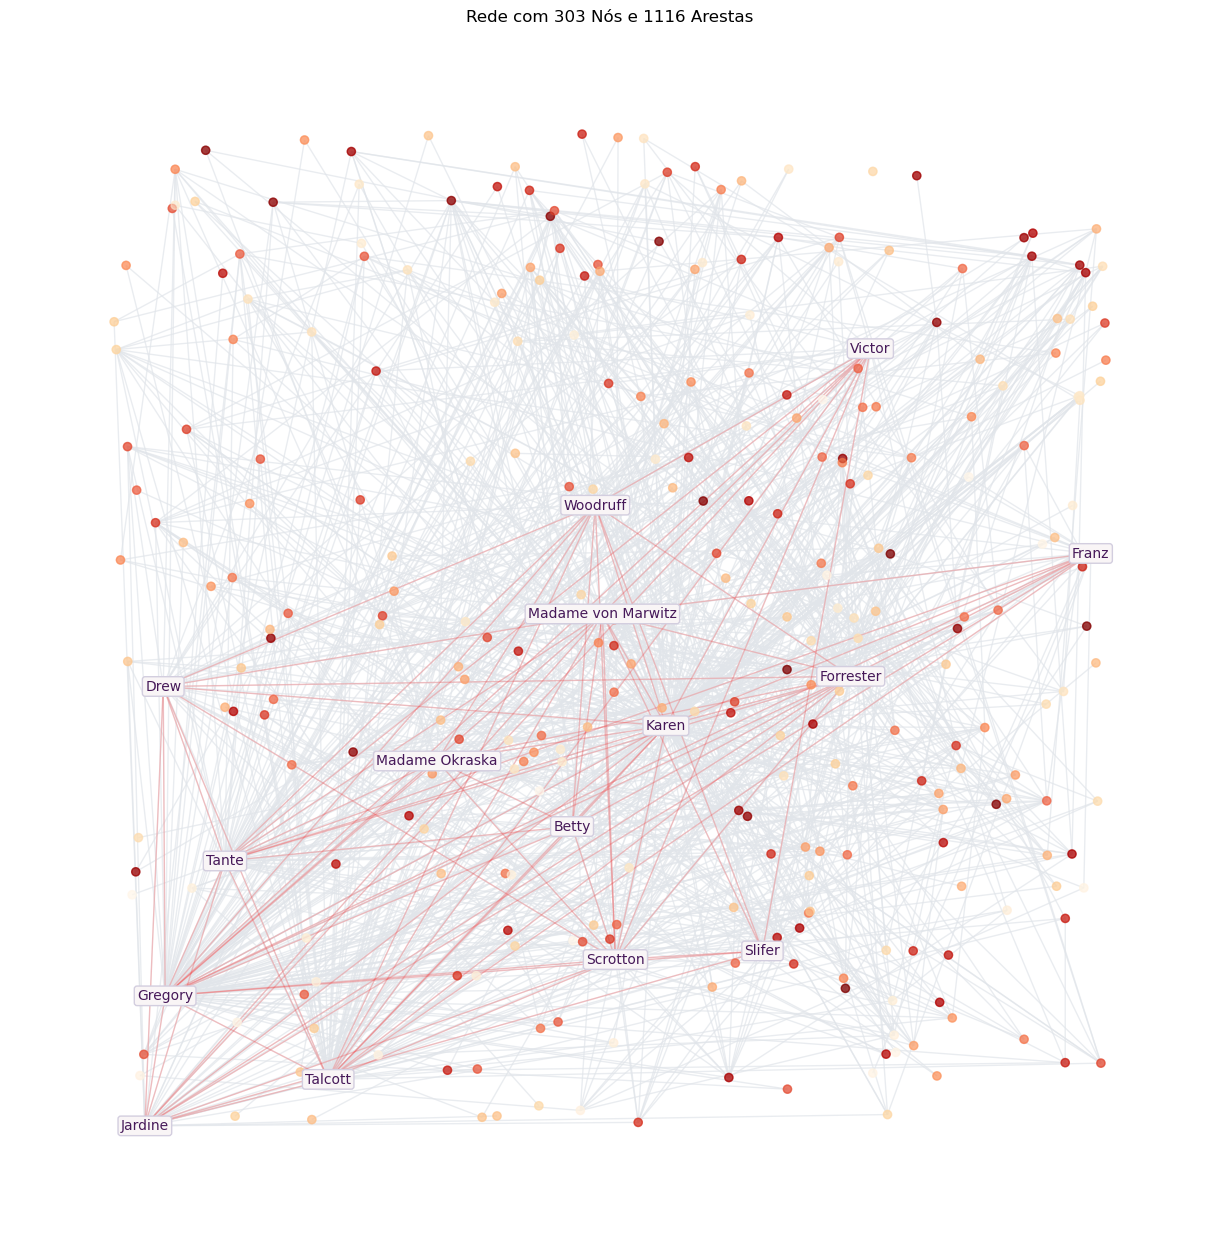

In [464]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Atribuir uma cor única a cada nó
node_colors = range(len(name_list))

# Identificar os 15 nós com maior grau
degrees = dict(G.degree())
top_degree_nodes = sorted(degrees, key=degrees.get, reverse=True)[:15]

# Determinar as arestas que conectam os nós de maior grau
edges_of_top_degree_nodes = [(u, v) for u, v in G.edges() if u in top_degree_nodes and v in top_degree_nodes]

# Posicionamento dos nós aleatório
pos = nx.random_layout(G)
# pos = nx.spring_layout(G)


plt.figure(figsize=(12, 12))

# Desenhar a rede
nx.draw(G,
        pos=pos,
        node_color=node_colors,
        cmap=plt.get_cmap('OrRd_r'),  # Escolha um mapa de cores aqui
        node_size=35,  # Tamanho dos nós
        edge_color="#E1E5EA", # "#DBDFEA"  # Cor das arestas
        with_labels=False,  # Não mostrar rótulos dos nós
        alpha= 0.7,
       ) 

# Adicionar as arestas dos nós de maior grau em uma cor diferente
nx.draw(G,
        pos=pos,
        node_color=node_colors,
        cmap=plt.get_cmap('OrRd_r'),  # Escolha um mapa de cores aqui
        node_size=35,  # Tamanho dos nós
        edgelist=edges_of_top_degree_nodes,
        edge_color='red',  # Cor das arestas dos nós de maior grau
        width=1.0,  # Largura das arestas
        alpha=0.2)  # Transparência das arestas

  
for node in top_degree_nodes:
    x, y = pos[node]
    plt.annotate(node, (x, y), ha='center', va='center', fontsize=10,
                 # fontweight='heavy',
                 color='#461959', #B80D57 #99235C
                 backgroundcolor='white',
                 bbox=dict(boxstyle='round,pad=0.2', edgecolor='#D3CEDF', facecolor='#F9F5F6'))
    
plt.title("Rede com 303 Nós e 1116 Arestas")
plt.axis('off')
plt.show()

In [254]:
components = [comp for comp in nx.connected_components(G)]
component_size = [len(comp) for comp in components]
print(G.number_of_nodes(), G.number_of_edges(), component_size)

315 1122 [303, 3, 1, 1, 2, 2, 2, 1]


In [263]:
# verificar!

G.edges.data() # https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.edges.html

EdgeDataView([('Bach', 'Appassionata', {'weight': 1}), ('Bach', 'Liszt', {'weight': 1}), ('Bach', 'Okraska', {'weight': 1}), ('Bach', 'Karen', {'weight': 1}), ('Bach', 'Bachnot Bach', {'weight': 1}), ('Bach', 'Tante', {'weight': 1}), ('Bach', 'Madame von Marwitz', {'weight': 1}), ('Bach', 'Beethoven', {'weight': 1}), ('Okraska', 'Appassionata', {'weight': 1}), ('Okraska', 'Bachnot Bach', {'weight': 1}), ('Okraska', 'Beethoven', {'weight': 1}), ('Beethoven', 'Appassionata', {'weight': 1}), ('Beethoven', 'Tag', {'weight': 1}), ('Beethoven', 'Schubert', {'weight': 1}), ('Beethoven', 'Kind', {'weight': 1}), ('Beethoven', 'Bachnot Bach', {'weight': 1}), ('Beethoven', 'Jew', {'weight': 1}), ('Beethoven', 'Brahms', {'weight': 1}), ('Appassionata', 'Bachnot Bach', {'weight': 1}), ('The Duchess of Bannister', 'Madame Okraska', {'weight': 1}), ('The Duchess of Bannister', 'Alliston Compton', {'weight': 1}), ('The Duchess of Bannister', 'Lady Champney', {'weight': 1}), ('Lady Champney', 'Madame O

In [472]:
def print_df(medida, nome):
    df = pd.DataFrame(medida.items(),columns=['Personagem', nome])
    b = [''] * len(df)
    df.index=b
    display(df)

# Medidas de centralidade (*Sem peso*)

- Centralidade de grau

Personagem         k
              Bach  0.025478
           Okraska  0.012739
         Beethoven  0.028662
      Appassionata  0.012739
      Bachnot Bach  0.012739
..             ...       ...
           Karen'd  0.012739
          Gregory.  0.006369
       Southampton  0.003185
    Franz, Gregory  0.009554
        Uncle Adam  0.006369

[315 rows x 2 columns]

Numero de nós (personagens): 315
Número de arestas: 1122


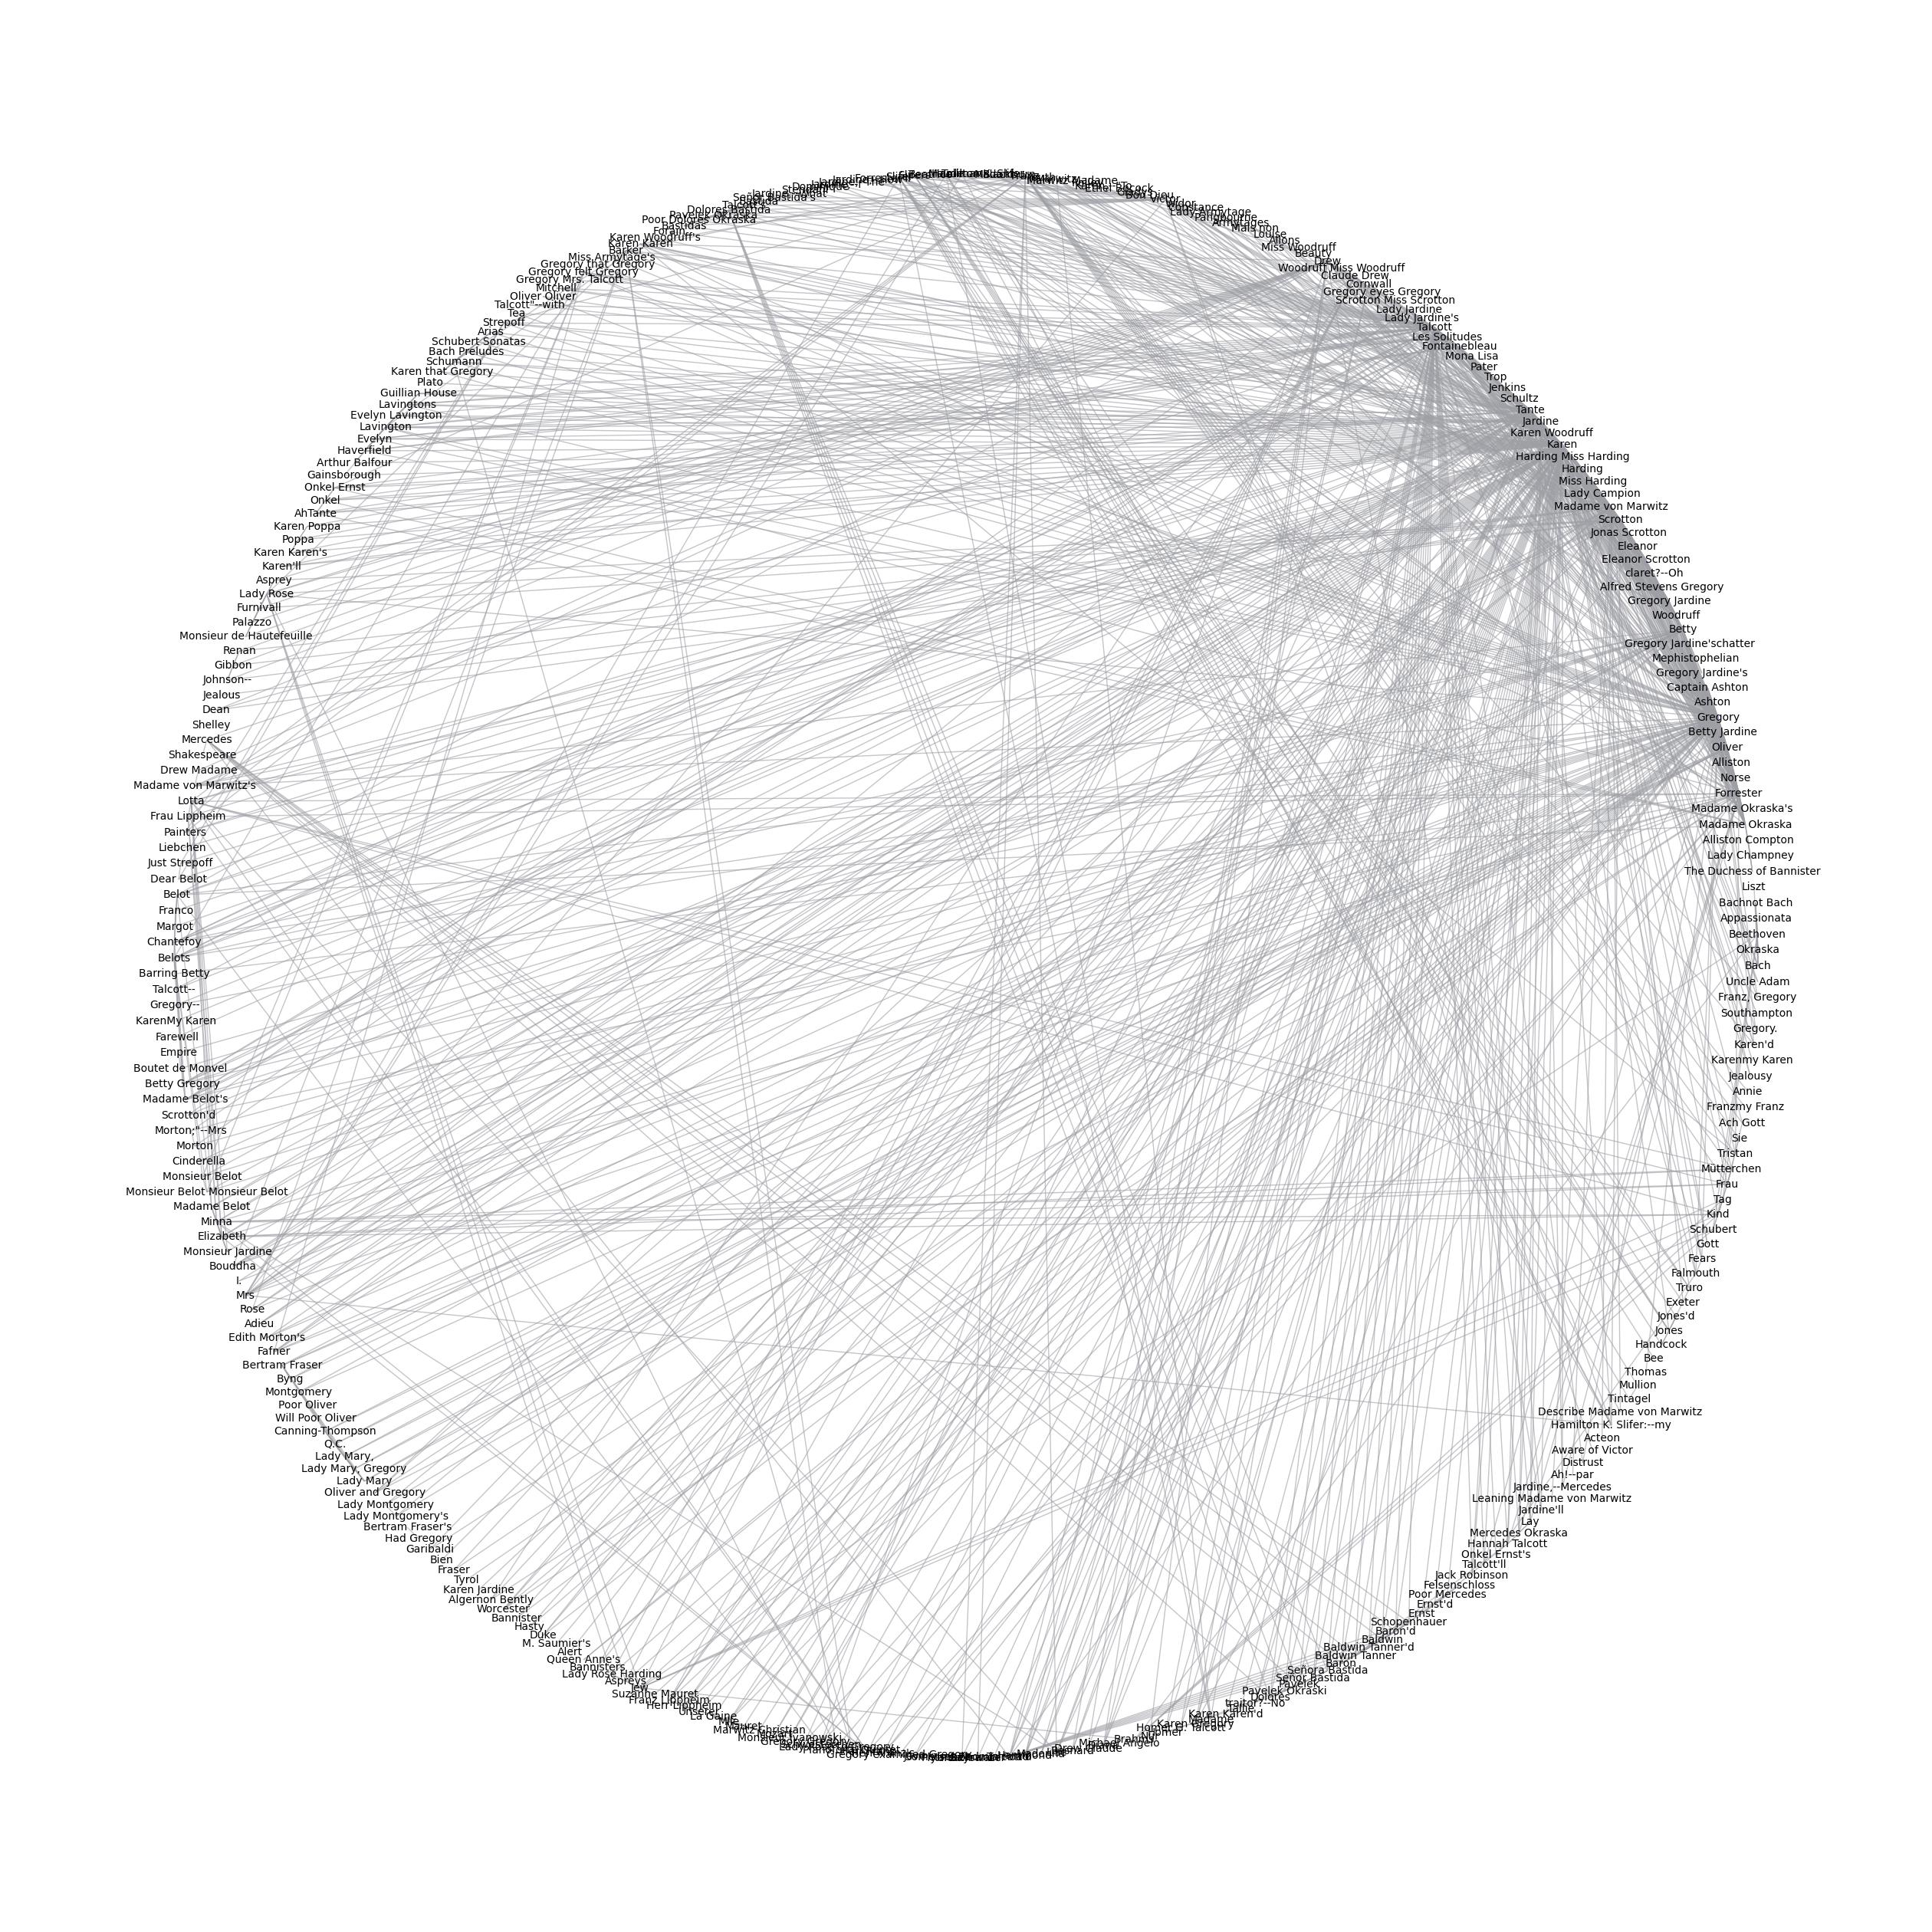

In [483]:
# K = dict(G.degree())
K = dict(nx.degree_centrality(G))
print_df(K, 'k')

plt.figure(figsize=(25,25))
pos=nx.circular_layout(G)
# pos = nx.layout.fruchterman_reingold_layout(G)
# pos = nx.random_layout(G)

N = len(G)
M = G.number_of_edges()
print("Numero de nós (personagens):", N)
print("Número de arestas:", M)

nx.draw(G,
        pos= pos,
        node_color = '#9288F8', #node_colors
        cmap=plt.cm.Pastel2,
        node_size=[v for v in K.values()],
        # width=weights,
        linewidths=weight,
        edge_color = '#9E9FA5', #9E9FA5
        font_color = 'k',
        alpha=0.6,
       )
for node, (x,y) in pos.items():
    plt.text(x,y, node, ha='center', va='center') 

plt.show(True)

- Clustering coeficient

In [474]:
CC = dict(nx.clustering(G))
print_df(CC, 'cc')

av_cc = np.mean(list(CC.values()))
print('Average clustering coeficient', av_cc)

# plt.figure(figsize=(6,6))
# pos=nx.circular_layout(G)
# nx.draw(G,
#         pos= pos,
#         node_color = '#9288F8', #node_colors #5C469C
#         cmap=plt.cm.Pastel2,
#         node_size=[v * 1000 for v in CC.values()],
#         width=weights,
#         linewidths=weight,
#         edge_color = '#9E9FA5', #9E9FA5
#         font_color = 'k',
#         alpha=0.5,
#        )
# for node, (x,y) in pos.items():
#     plt.text(x,y, node, ha='center', va='center') 

# plt.show(True)

Personagem        cc
              Bach  0.321429
           Okraska  1.000000
         Beethoven  0.444444
      Appassionata  1.000000
      Bachnot Bach  1.000000
..             ...       ...
           Karen'd  1.000000
          Gregory.  1.000000
       Southampton  0.000000
    Franz, Gregory  1.000000
        Uncle Adam  1.000000

[315 rows x 2 columns]

Average clustering coeficient 0.6998853922707411


- Closeness centrality

In [475]:
CLC = dict(nx.closeness_centrality(G))
print_df(CLC, 'clc')

av_clc = np.mean(list(CLC.values()))
print('Average closeness centrality', av_clc)

# plt.figure(figsize=(6,6))
# pos=nx.circular_layout(G)
# nx.draw(G,
#         pos= pos,
#         node_color = '#9288F8', #node_colors
#         cmap=plt.cm.Pastel2,
#         node_size=[v * 1000 for v in CLC.values()],
#         width=weights,
#         linewidths=weight,
#         edge_color = '#9E9FA5', #9E9FA5
#         font_color = 'k',
#         alpha=0.6,
#        )
# for node, (x,y) in pos.items():
#     plt.text(x,y, node, ha='center', va='center') 

# plt.show(True)

Personagem       clc
              Bach  0.410833
           Okraska  0.291625
         Beethoven  0.309988
      Appassionata  0.291625
      Bachnot Bach  0.291625
..             ...       ...
           Karen'd  0.427774
          Gregory.  0.417926
       Southampton  0.337743
    Franz, Gregory  0.420954
        Uncle Adam  0.400633

[315 rows x 2 columns]

Average closeness centrality 0.37194575508798344


- Betweenness centrality

In [476]:
B = dict(nx.betweenness_centrality(G,
                                   # weight='weight',
                                   endpoints=True
                                  ))
print_df(B, 'b')

av_B = np.mean(list(B.values()))
print('Average betweenness centrality', av_B)

# plt.figure(figsize=(6,6))
# pos=nx.circular_layout(G)
# nx.draw(G,
#         pos= pos,
#         node_color = '#9288F8', #node_colors #5C469C #9288F8
#         cmap=plt.cm.Pastel2,
#         node_size=[v * 1000 for v in B.values()],
#         width=weights,
#         linewidths=weight,
#         edge_color = '#9E9FA5', #9E9FA5
#         font_color = 'k',
#         alpha=0.7,
#        )
# for node, (x,y) in pos.items():
#     plt.text(x,y, node, ha='center', va='bottom') 

# plt.show(True)

Personagem         b
              Bach  0.031713
           Okraska  0.006107
         Beethoven  0.007678
      Appassionata  0.006107
      Bachnot Bach  0.006107
..             ...       ...
           Karen'd  0.006107
          Gregory.  0.006107
       Southampton  0.006107
    Franz, Gregory  0.006107
        Uncle Adam  0.006107

[315 rows x 2 columns]

Average betweenness centrality 0.010370241986863158


- Eigenvetor centrality

In [477]:
EC = dict(nx.eigenvector_centrality(G))
print_df(EC, 'ec')

av_EC = np.mean(list(EC.values()))
print('Average eigenvetor centrality:', av_EC)

# plt.figure(figsize=(6,6))
# pos=nx.circular_layout(G)
# nx.draw(G,
#         pos= pos,
#         node_color = '#9288F8', #node_colors
#         cmap=plt.cm.Pastel2,
#         node_size=[v * 1000 for v in EC.values()],
#         width=weights,
#         linewidths=weight,
#         edge_color = '#9E9FA5', #9E9FA5
#         font_color = 'k',
#         alpha=0.7,
#        )
# for node, (x,y) in pos.items():
#         plt.text(x,y, node, ha='center', va='center') 

# plt.show(True)

Personagem        ec
              Bach  0.035095
           Okraska  0.001973
         Beethoven  0.004689
      Appassionata  0.001973
      Bachnot Bach  0.001973
..             ...       ...
           Karen'd  0.044289
          Gregory.  0.032163
       Southampton  0.009955
    Franz, Gregory  0.036905
        Uncle Adam  0.028621

[315 rows x 2 columns]

Average eigenvetor centrality: 0.036481720068955795


In [480]:
# KC = dict(nx.katz_centrality(G))
# print_df(KC, 'kc')

# av_KC = np.mean(list(KC.values()))
# print('Average katz cenrtality:', av_KC)

# plt.figure(figsize=(6,6))
# pos=nx.circular_layout(G)
# nx.draw(G,
#         pos= pos,
#         node_color = '#9288F8', #node_colors
#         cmap=plt.cm.Pastel2,
#         node_size=[v * 1000 for v in KC.values()],
#         width=weights,
#         linewidths=weight,
#         edge_color = '#9E9FA5', #9E9FA5
#         font_color = 'k',
#         alpha=0.7,
#        )
# for node, (x,y) in pos.items():
#     plt.text(x,y, node, ha='center', va='center') 

# plt.show(True)

- PageRank

In [481]:
PR = dict(nx.pagerank(G, alpha=0.85))
print_df(PR, 'pr')

av_pr = np.mean(list(PR.values()))
print('Average PageRank', av_pr)

# plt.figure(figsize=(6,6))
# pos=nx.circular_layout(G)
# nx.draw(G,
#         pos= pos,
#         node_color = '#9288F8', #node_colors
#         cmap=plt.cm.Pastel2,
#         node_size=[v * 1000 for v in PR.values()],
#         width=weights,
#         linewidths=weight,
#         edge_color = '#9E9FA5', #9E9FA5
#         font_color = 'k',
#         alpha=0.8,
#        )
# for node, (x,y) in pos.items():
#     plt.text(x,y, node, ha='center', va='bottom') 

# plt.show(True)

Personagem        pr
              Bach  0.003214
           Okraska  0.002034
         Beethoven  0.003636
      Appassionata  0.002034
      Bachnot Bach  0.002034
..             ...       ...
           Karen'd  0.001018
          Gregory.  0.000745
       Southampton  0.000603
    Franz, Gregory  0.000881
        Uncle Adam  0.000743

[315 rows x 2 columns]

Average PageRank 0.0031746031746031746


## Correlação entre medidas de centralidade

In [484]:
df = pd.DataFrame({'K':list(K.values()),
                   # 'CC':list(CC.values()),
                   'CLC':list(CLC.values()),
                   'B':list(B.values()),
                   'EC':list(EC.values()),
                   # 'KC':list(KC.values()),
                   'PR':list(PR.values()),
                   })
display(df)

K       CLC         B        EC        PR
0    0.025478  0.410833  0.031713  0.035095  0.003214
1    0.012739  0.291625  0.006107  0.001973  0.002034
2    0.028662  0.309988  0.007678  0.004689  0.003636
3    0.012739  0.291625  0.006107  0.001973  0.002034
4    0.012739  0.291625  0.006107  0.001973  0.002034
..        ...       ...       ...       ...       ...
310  0.012739  0.427774  0.006107  0.044289  0.001018
311  0.006369  0.417926  0.006107  0.032163  0.000745
312  0.003185  0.337743  0.006107  0.009955  0.000603
313  0.009554  0.420954  0.006107  0.036905  0.000881
314  0.006369  0.400633  0.006107  0.028621  0.000743

[315 rows x 5 columns]

In [485]:
corr = df.corr()
print('Correlação:\n', corr)

Correlação:
             K       CLC         B        EC        PR
K    1.000000  0.437839  0.939166  0.922025  0.964034
CLC  0.437839  1.000000  0.351810  0.608942  0.323268
B    0.939166  0.351810  1.000000  0.786754  0.970352
EC   0.922025  0.608942  0.786754  1.000000  0.831997
PR   0.964034  0.323268  0.970352  0.831997  1.000000


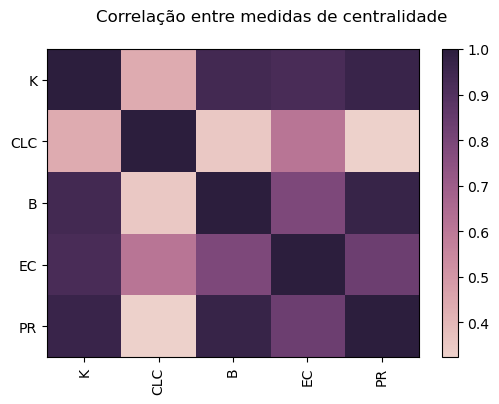

In [486]:
# Plot Correlation Matrix
plt.figure(figsize=(6,4))

plt.imshow(corr,
           cmap=sns.cubehelix_palette(as_cmap=True), # 'crest'
           interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlação entre medidas de centralidade')
plt.grid(False)
plt.show()

In [172]:
# Basic correlogram

# sns.pairplot(df)
# plt.show(True)

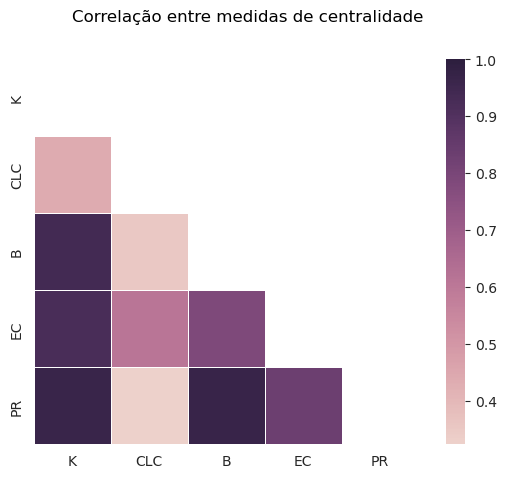

In [487]:
import seaborn as sns

plt.figure(figsize=(7, 5))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True, linewidth=.5,
                     cmap=sns.cubehelix_palette(as_cmap=True),   # "crest"
                    )
plt.suptitle('Correlação entre medidas de centralidade')
plt.show()

# Vectorização das medidas de rede

In [488]:
df.describe()

K         CLC           B            EC          PR
count  315.000000  315.000000  315.000000  3.150000e+02  315.000000
mean     0.022687    0.371946    0.010370  3.648172e-02    0.003175
std      0.044202    0.088814    0.027816  4.300650e-02    0.010438
min      0.000000    0.000000    0.000000  5.476779e-25    0.000480
25%      0.006369    0.345373    0.006107  1.443035e-02    0.000853
50%      0.012739    0.388833    0.006107  2.452097e-02    0.001317
75%      0.022293    0.416131    0.006296  4.173953e-02    0.002138
max      0.519108    0.648345    0.395333  3.930049e-01    0.142361

In [491]:
# Vetor contendo os valores médios das medidas de centralidade da rede de co-ocorrência
medidasp = list(df.mean())
print('Vetor com médias de medidas de rede:\n', medidasp)

Vetor com médias de medidas de rede:
 [0.022687291477100392, 0.37194575508798344, 0.010370241986863158, 0.036481720068955795, 0.0031746031746031746]


## Classificação

### Exemplo

In [492]:
num_vetores = 100
matriz_vetores = np.zeros((num_vetores, len(medidasp)))

# Gerar os vetores aleatórios parecidos com o padrão
for i in range(num_vetores):
    # Adicionando ruído aleatório aos elementos do padrão
    vetor_aleatorio = medidasp + np.random.normal(0, 0.1, len(medidasp))
    matriz_vetores[i] = vetor_aleatorio

# Visualizar a matriz de vetores gerada
print("Matriz de Vetores:")
print(matriz_vetores)

Matriz de Vetores:
[[ 0.1795586   0.36208783  0.12190985  0.12222685 -0.05755002]
 [-0.04901274  0.39853606 -0.03508775  0.23676632 -0.02905183]
 [ 0.05049301  0.16924841 -0.02492727  0.10324809 -0.02844518]
 [ 0.13622418  0.34543833  0.12180228  0.1459265   0.00800795]
 [-0.13499447  0.30672303 -0.12743503  0.04812834  0.02300125]
 [-0.01000355  0.4078699   0.09068611 -0.14979487 -0.02649867]
 [-0.14438412  0.3021409  -0.15634902  0.11738153 -0.03514733]
 [ 0.014246    0.52026741  0.08312634 -0.21411055 -0.05950731]
 [ 0.03634881  0.47018215 -0.08572453 -0.11073112 -0.08368311]
 [-0.06068685  0.44080616  0.09885485  0.16909642 -0.03041818]
 [-0.04360683  0.46457326  0.00623847  0.11265658 -0.05801556]
 [ 0.02762719  0.34599258 -0.0614222   0.05019659 -0.20624246]
 [ 0.19680424  0.2594925  -0.18021233  0.00638013 -0.15291704]
 [ 0.15484658  0.31230212  0.12642682  0.03691055 -0.01696603]
 [ 0.06662333  0.46647584 -0.00124464  0.10628072 -0.07654619]
 [ 0.02366137  0.22869492  0.0876649

#### Modelos

Para o seguinte problema de classificação utilizaremos algoritmos para atribuir com precisão os dados de teste em categorias específicas. Estes algoritmos correspondem ao aprendizado de máquina supervisionado. Utilizaremos entradas e saídas rotuladas, o modelo pode medir sua precisão e aprender com o tempo.

In [493]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# dados
X = matriz_vetores
y = np.random.randint(2, size=100) # classes de sucesso
print("classes de sucesso:", y)

# Separar em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo (usando KNN neste exemplo)
knn = KNeighborsClassifier(n_neighbors=5)  # K=5 para o exemplo, ajuste conforme necessário
knn.fit(X_train, y_train)

# Previsão das classes para o conjunto de teste
y_pred = knn.predict(X_test)

classes de sucesso: [0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1
 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1
 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0]


In [494]:
# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# precisão, recall, F1-score e matriz de confusão.
report = classification_report(y_test, y_pred)
print("Relatório de Classificação:\n", report)


Acurácia: 0.45
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.43      0.67      0.52         9
           1       0.50      0.27      0.35        11

    accuracy                           0.45        20
   macro avg       0.46      0.47      0.44        20
weighted avg       0.47      0.45      0.43        20



In [ ]:
# Acurácia (Accuracy):
# A acurácia é a proporção de exemplos classificados corretamente em relação ao total de exemplos.

# a acurácia é 0.45, o que significa que 45% das previsões foram corretas.

# Precision (Precisão):
# É a proporção de exemplos verdadeiros positivos em relação ao total de exemplos classificados como positivos.

# Para a classe 0, a precisão é 0.50 e para a classe 1, a precisão é 0.42.

# Recall (Revocação):
# É a proporção de exemplos verdadeiros positivos em relação ao total de exemplos que são realmente positivos.

# Para a classe 0, o recall é 0.36 e para a classe 1, o recall é 0.56.

# F1-Score:
# O F1-score é a média harmônica da precisão e do recall. 
# Fornece um equilíbrio entre precisão e recall. 

# Para a classe 0, o F1-score é 0.42 e para a classe 1, o F1-score é 0.48.

# Support:
# É o número de ocorrências reais da classe no conjunto de dados.

# Macro Avg (Média Macro):
# É a média não ponderada das métricas (precision, recall, F1-score) para todas as classes.

# Weighted Avg (Média Ponderada):
# É a média ponderada das métricas (precision, recall, F1-score) para todas as classes, 
# onde as ponderações são dadas pelo suporte de cada classe.
